## Machine Vision and Pattern Recognition

1. Basic statistical features of an image
2. Basic patterns in an image
3. Pattern recognition techniques
4. Main difference between syntactical and statistical patterns in an image

1. Import openCV model in python, load images, display, save and get the image dimensions.
2. Convert color image to grayscale. Display the change in dimensions between grayscale and color
3. View individual channels of RGB image.
4. Perform image translations, rotations and flipping.
5. Resize and scale images. Show the cropping of images.
6. Convert a gray scale image into binary image without using bultin functions
7. Find the complement of a grayscale image and color image.
8. Manipulate color spaces such as RGB, HSV and LAB
9. Split and merge color channels in openCV
10. View individual channels in openCV.

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, entropy
from tabulate import tabulate


In [3]:

image_var = {}
image_list = ["tree_leaves.jpg", "blurred_sky.jpg", "flower1.png"]
for name in image_list:
    image_var[f"image_{image_list.index(name)}"] = cv2.imread(name, cv2.IMREAD_COLOR_RGB)

for key in image_var:
    print(key)

image_0
image_1
image_2


Displaying the images with their dimensions

TypeError: Image data of dtype object cannot be converted to float

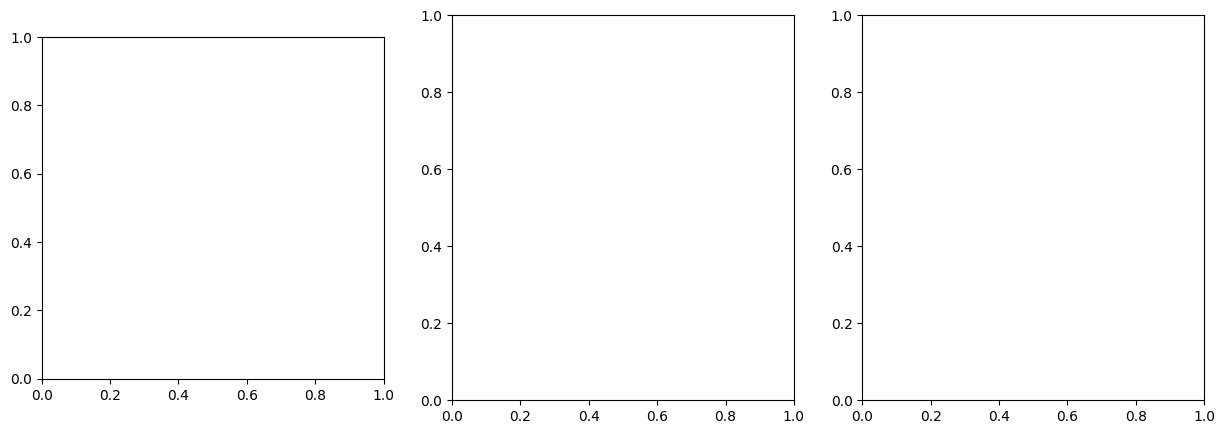

In [4]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
i=0
for image in image_var:
    axes[i].imshow(image_var[image])
    i+=1
    print(f"The dimensions of {image} is {image_var[image].shape[0]}x{image_var[image].shape[1]}")

Convert and display the image in grayscale

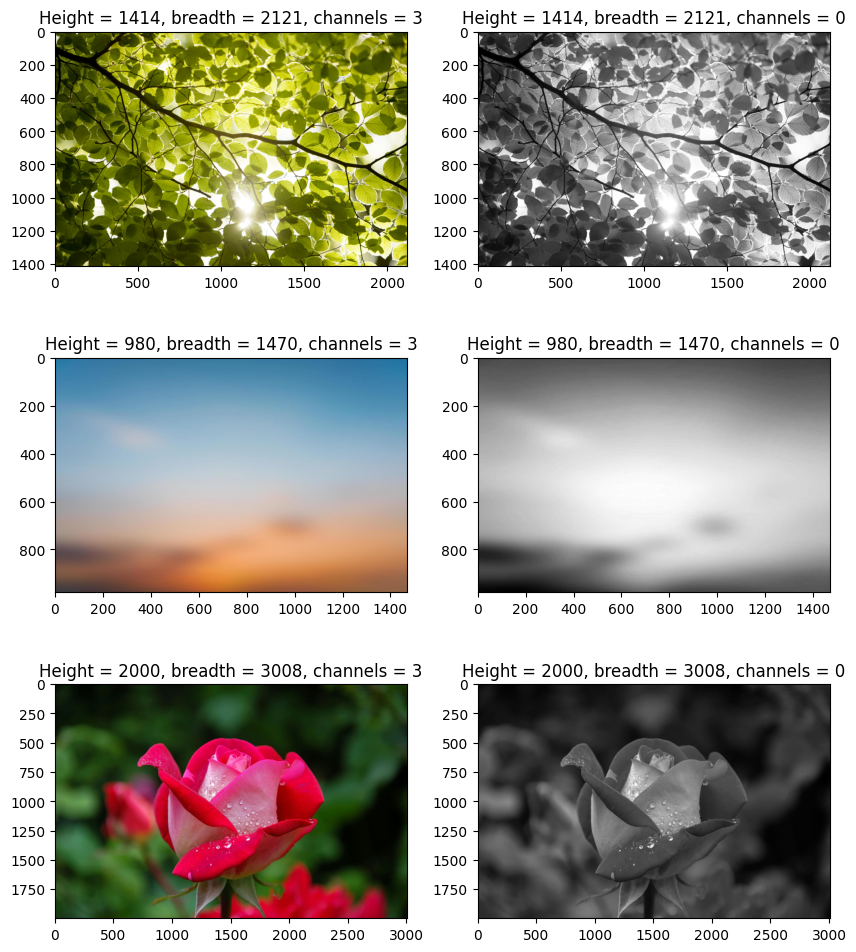

In [6]:
fig1, axes1 = plt.subplots(3, 2, figsize = (10, 12))
i=0
for image in image_var:
    axes1[i][0].imshow(image_var[image])
    axes1[i][0].set_title(f"Height = {image_var[image].shape[0]}, breadth = {image_var[image].shape[1]}, channels = {image_var[image].shape[2]}")
    g_image = cv2.cvtColor(image_var[image], cv2.COLOR_RGB2GRAY)
    axes1[i][1].set_title(f"Height = {g_image.shape[0]}, breadth = {g_image.shape[1]}, channels = 0")
    axes1[i][1].imshow(g_image, cmap = "gray")
    i+=1


View individual channels of an RGB image

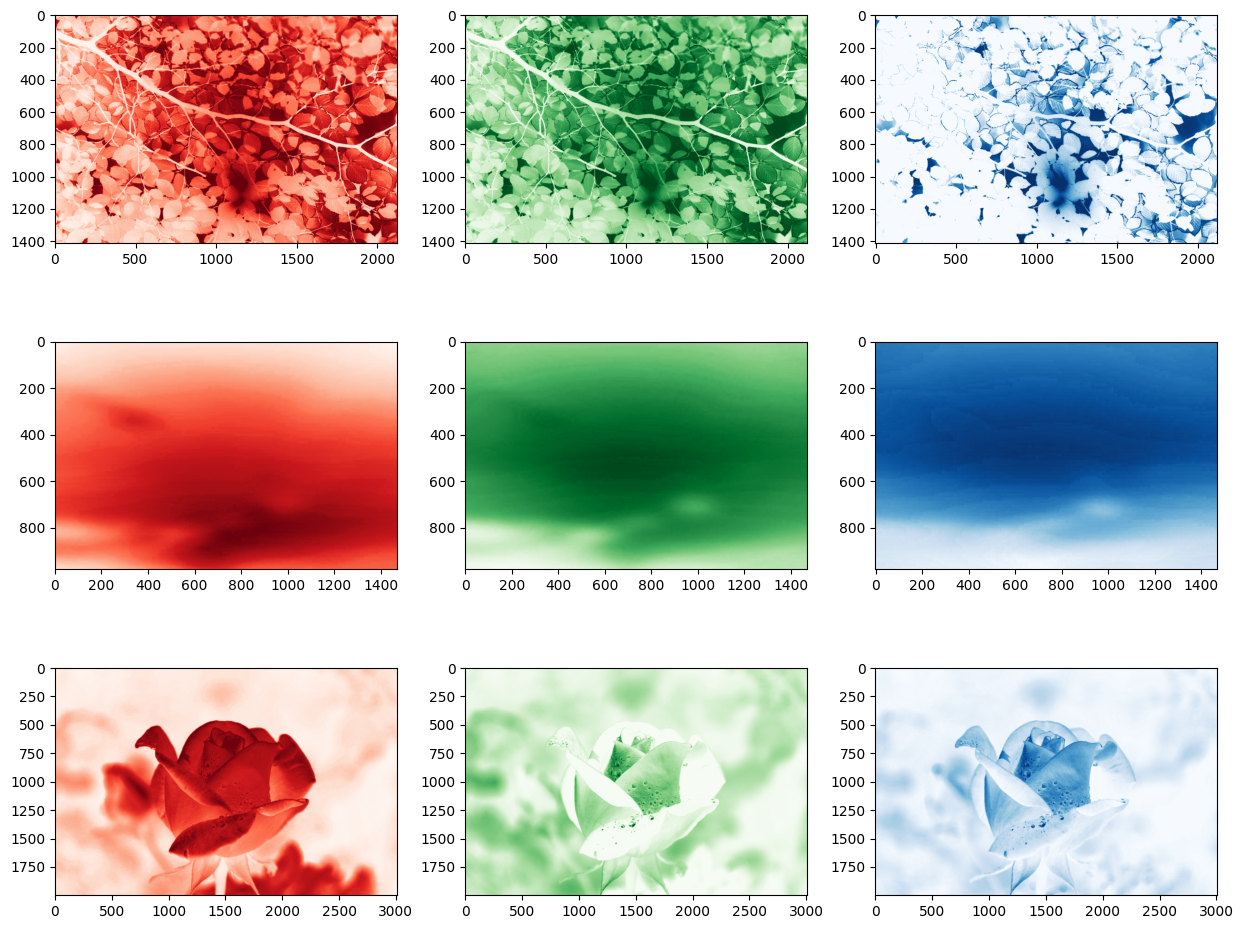

In [7]:
fig1, axes1 = plt.subplots(3, 3, figsize = (15, 12))
i=0
for image in image_var:
    R, G, B = cv2.split(image_var[image])
    axes1[i][0].imshow(R, cmap = 'Reds')
    axes1[i][1].imshow(G, cmap = 'Greens')
    axes1[i][2].imshow(B, cmap = 'Blues')
    i+=1

Perform image translations, rotations and flipping.

Text(0.5, 1.0, 'Rotation by 45 degrees')

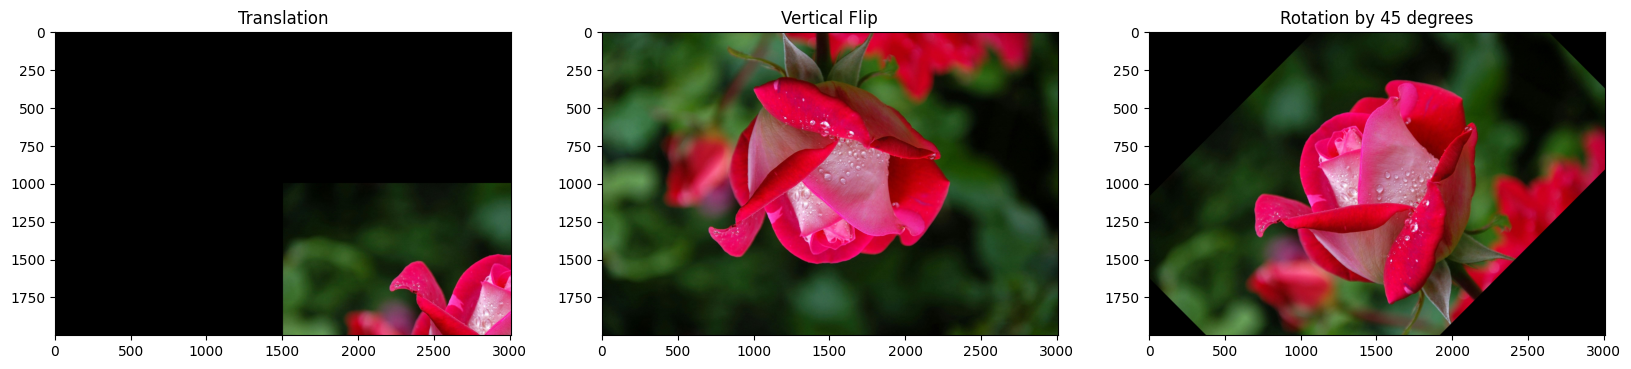

In [8]:
image1 = cv2.imread("flower1.png", cv2.IMREAD_COLOR_RGB)

new_width = image1.shape[1]//2
new_height = image1.shape[0]//2

fig, axes = plt.subplots(1, 3, figsize = (20, 10))
T = np.float32([[1, 0, new_width], [0, 1, new_height]])
image1_translation = cv2.warpAffine(image1, T, (image1.shape[1], image1.shape[0]))
axes[0].imshow(image1_translation)
axes[0].set_title("Translation")

axes[1].imshow(cv2.flip(image1, 0))
axes[1].set_title("Vertical Flip")

image1_center = (image1.shape[1]//2, image1.shape[0]//2)
rotation_matrix = cv2.getRotationMatrix2D(image1_center, angle = 45, scale = 1)
rotated_image = cv2.warpAffine(src= image1, M = rotation_matrix, dsize = (image1.shape[1], image1.shape[0]))
axes[2].imshow(rotated_image)
axes[2].set_title("Rotation by 45 degrees")

Resize and scale images. Show the cropping of images

Text(0.5, 1.0, 'Cropped Image')

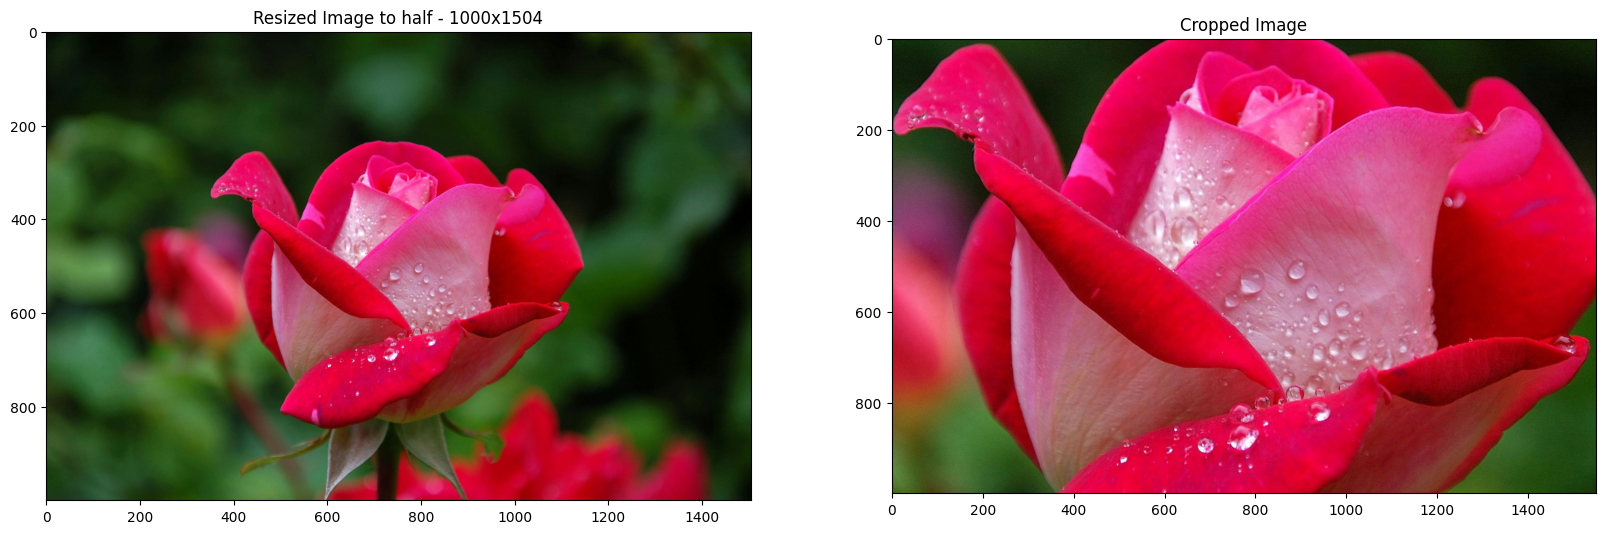

In [9]:
fig_1, axes_1 = plt.subplots(1, 2, figsize = (20, 10))
resized_images = cv2.resize(image1, (image1.shape[1]//2, image1.shape[0]//2))
axes_1[0].imshow(resized_images)
axes_1[0].set_title(f"Resized Image to half - {resized_images.shape[0]}x{resized_images.shape[1]}")

cropped_image = image1[500:1500, 700:2250]
axes_1[1].imshow(cropped_image)
axes_1[1].set_title("Cropped Image")


Convert a grayscale image to binary image without using any builtin functions

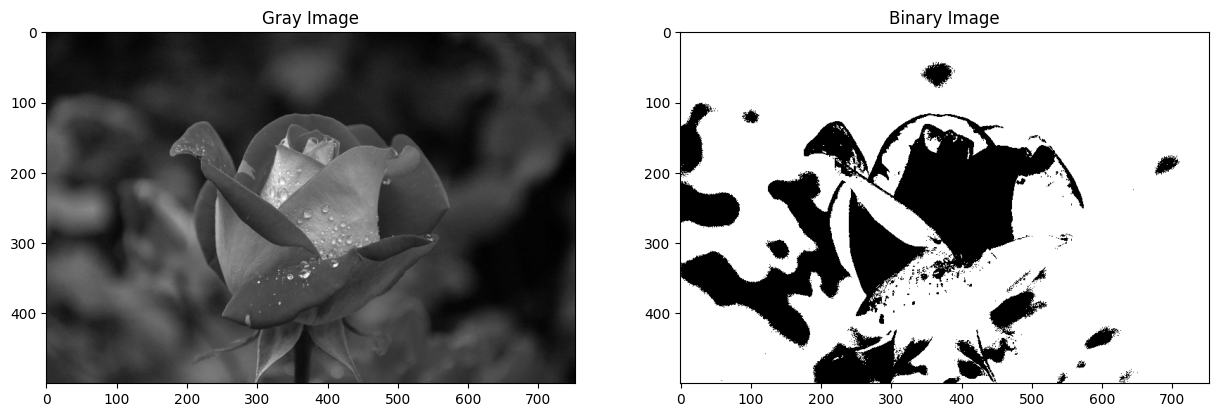

In [10]:
fig_2, axes_2 = plt.subplots(1, 2, figsize = (15, 10))

image1_gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image1_gray = cv2.resize(image1_gray, (image1_gray.shape[1]//4, image1_gray.shape[0]//4))
bin_image = np.ones(image1_gray.shape)
for i in range(image1_gray.shape[0]):
    for j in range(image1_gray.shape[1]):
        if image1_gray[i][j] > 80:
            bin_image[i][j] = 0
        else:
            bin_image[i][j] = 255

axes_2[0].set_title("Gray Image")
axes_2[0].imshow(image1_gray, cmap = "gray")
axes_2[1].set_title("Binary Image")
axes_2[1].imshow(bin_image, cmap = "gray")

        

Complement of a grayscale and a binary image

In [ ]:
rgb_image = cv2.imread("flower1.png", cv2.IMREAD_COLOR_RGB)
comp_gray_image = 255 - image1_gray
comp_rgb_image = 255 - rgb_image
fig_3, axes_3 = plt.subplots(1, 2, figsize = (15, 10))
axes_3[0].imshow(comp_gray_image, cmap = "gray")
axes_3[0].set_title("Complement of Gray Image")
axes_3[1].imshow(comp_rgb_image, cmap = "gray")
axes_3[1].set_title("Complement of Binary Image")


NameError: name 'cv2' is not defined

Manipulate color spaces such as RGB, HSV, LAB

Text(0.5, 1.0, 'LAB Image')

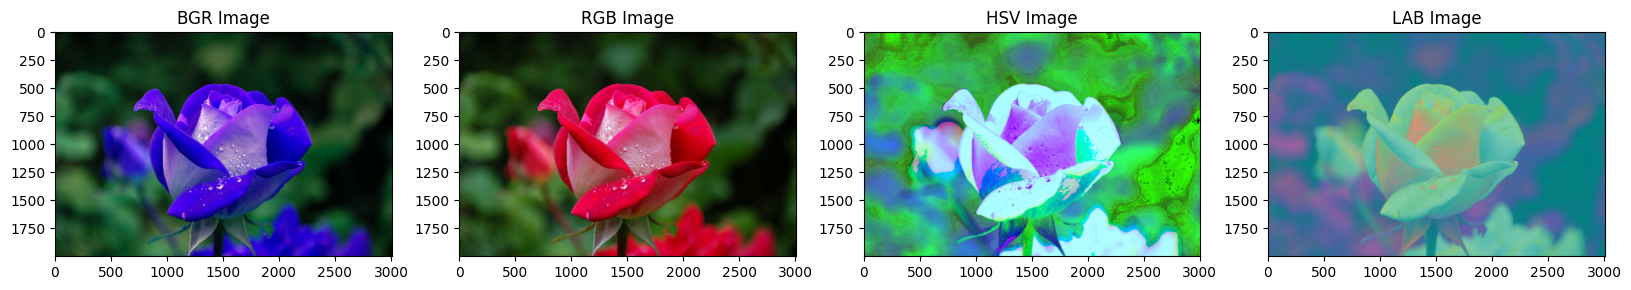

In [34]:
bgr_image1 = cv2.imread("flower1.png")
rgb_image1 = cv2.cvtColor(bgr_image1, cv2.COLOR_BGR2RGB)
hsv_image1 = cv2.cvtColor(bgr_image1, cv2.COLOR_BGR2HSV)
lab_image1 = cv2.cvtColor(bgr_image1, cv2.COLOR_BGR2LAB)

hsv_image1[:,:,2] = np.clip(hsv_image1[:,:,2] * 1.5, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 4, figsize = (20, 10))
axes[0].imshow(bgr_image1)
axes[0].set_title("BGR Image")

axes[1].imshow(rgb_image1)
axes[1].set_title("RGB Image")

axes[2].imshow(hsv_image1)
axes[2].set_title("HSV Image")

axes[3].imshow(lab_image1)
axes[3].set_title("LAB Image")



Split and merge color channels

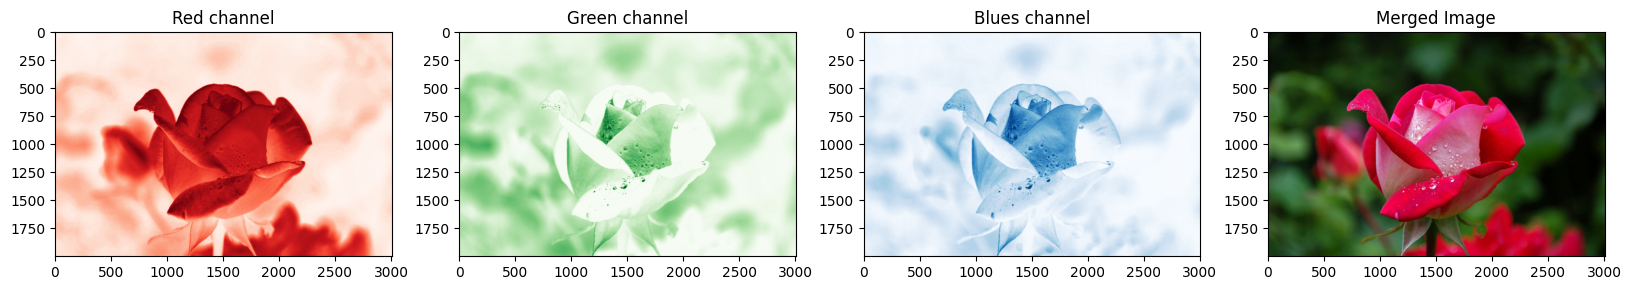

In [20]:
image1 = cv2.imread("flower1.png", cv2.IMREAD_COLOR_RGB)
fig, axes = plt.subplots(1, 4, figsize = (20, 15))
R, G, B = cv2.split(image1)

axes[0].imshow(R, cmap = "Reds")
axes[0].set_title("Red channel")
axes[1].imshow(G, cmap = "Greens")
axes[1].set_title("Green channel")
axes[2].imshow(B, cmap = "Blues")
axes[2].set_title("Blues channel")

merged_image = cv2.merge([R, G, B])
axes[3].set_title("Merged Image")
axes[3].imshow(merged_image)


View the individual channels in openCV

In [1]:
image1 = cv2.imread("flower1.png", cv2.IMREAD_COLOR_RGB)
fig, axes = plt.subplots(1, 4, figsize = (20, 15))
R, G, B = cv2.split(image1)

axes[0].set_title("Original Image Image")
axes[0].imshow(image1)
axes[1].imshow(R, cmap = "Reds")
axes[1].set_title("Red channel")
axes[2].imshow(G, cmap = "Greens")
axes[2].set_title("Green channel")
axes[3].imshow(B, cmap = "Blues")
axes[3].set_title("Blues channel")



NameError: name 'cv2' is not defined

Here to show the different statistical features, we are taking two images, one is a blurred image while the other one is more detailed


Calculating the first order statistical features of the two images

In [14]:
# f_table = []
# for image in image_var:
#     mean = np.mean(image_var[image])
#     std_dev = np.std(image_var[image])
#     variance = np.var(image_var[image])
#     skewness = skew(image_var[image].flatten())
#     kurt = kurtosis(image_var[image].flatten())
#     entr = entropy(np.histogram(image_var[image], bins = 256, density=True)[0])
#     f_table.append([image, mean, std_dev, variance, skewness, kurt, entr])

# print(tabulate(f_table, 
#                headers = ['Image', 'Mean', 'Standard Deviation', 'Variance', 'Skewness', 'Kurtosis', 'entropy'],
#                colalign=['center', 'center', 'center', 'center', 'center', 'center', 'center'], tablefmt="grid"))


s_features_df = pd.DataFrame({
    "Image": [image for image in image_var],
    "Mean": [np.mean(image_var[image]) for image in image_var],
    "Standard Deviation": [np.std(image_var[image]) for image in image_var],
    "Variance": [np.var(image_var[image]) for image in image_var],
    "Skewness": [skew(image_var[image].flatten()) for image in image_var],
    "Kurtosis": [kurtosis(image_var[image].flatten()) for image in image_var],
    "Entropy": [entropy(image_var[image].flatten()) for image in image_var]
})


print(tabulate(s_features_df, headers = 'keys', tablefmt='rounded_grid'))

print(f"The brightest image from the three is {s_features_df.loc[s_features_df['Mean'].idxmax()].iloc[0]} while the darker image is {s_features_df.loc[s_features_df['Mean'].idxmin()].iloc[0]}")

╭────┬─────────┬──────────┬──────────────────────┬────────────┬────────────┬────────────┬───────────╮
│    │ Image   │     Mean │   Standard Deviation │   Variance │   Skewness │   Kurtosis │   Entropy │
├────┼─────────┼──────────┼──────────────────────┼────────────┼────────────┼────────────┼───────────┤
│  0 │ image_0 │ 105.636  │              82.0492 │    6732.08 │   0.26643  │  -1.16567  │   15.6439 │
├────┼─────────┼──────────┼──────────────────────┼────────────┼────────────┼────────────┼───────────┤
│  1 │ image_1 │ 158.416  │              45.2376 │    2046.44 │  -0.763634 │  -0.275005 │   15.2332 │
├────┼─────────┼──────────┼──────────────────────┼────────────┼────────────┼────────────┼───────────┤
│  2 │ image_2 │  57.0587 │              57.9703 │    3360.55 │   1.52044  │   1.65525  │   16.2572 │
╰────┴─────────┴──────────┴──────────────────────┴────────────┴────────────┴────────────┴───────────╯
The brightest image from the three is image_1 while the darker image is image_2
